In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
warnings.filterwarnings('ignore')

In [2]:
# Reading the data (Hidden Input)

df = pd.read_csv("Fish.csv")
df.head().style.background_gradient(cmap='YlGnBu')

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.000000,23.200000,25.400000,30.000000,11.520000,4.020000
1,Bream,290.000000,24.000000,26.300000,31.200000,12.480000,4.305600
2,Bream,340.000000,23.900000,26.500000,31.100000,12.377800,4.696100
3,Bream,363.000000,26.300000,29.000000,33.500000,12.730000,4.455500
4,Bream,430.000000,26.500000,29.000000,34.000000,12.444000,5.134000


In [3]:
# Checking the number of rows and columns (Hidden Input)

print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 159
Number of Columns: 7


In [4]:
# Checking for any missing values in all features (Hidden Input)

print("*" * 30)
print(df.isnull().sum())
print("*" * 30)
print("No Missing Values Detected!")

******************************
Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64
******************************
No Missing Values Detected!


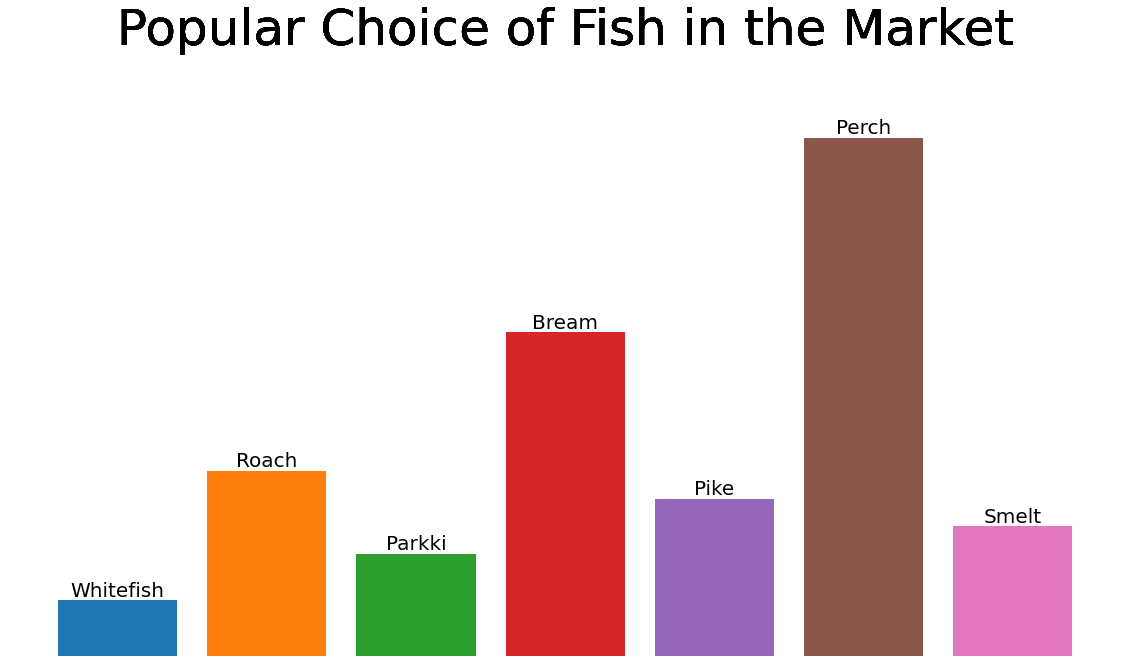

In [21]:
# All Credits for the following code to : https://www.kaggle.com/jeongbinpark/how-to-emphasize-your-think-at-viusalization for amazing Lesson on Visualization

# Visualizing the Number of Species in the Market; Finding the most popular one. (Hidden Input)

fig, ax = plt.subplots(figsize=(20,10), facecolor="w")
fish = list(set(df['Species'] ))

for i in range(len(fish)):
    count_of_fish = len(list(filter(lambda n: n == fish[i], df["Species"])))
    plt.bar(x=fish[i],height=count_of_fish)
    plt.text(s=fish[i],x=i,y=count_of_fish,va='bottom',ha='center',fontsize=20,)
    plt.text(s="Popular Choice of Fish in the Market",x=3,y=65,fontsize=50,va='bottom',ha='center')

plt.axis('off')
plt.show()

In [6]:
# Next, we will check for any Outliers in the data.

# Checking the Descriptive statistics of the numerical columns (Hidden Input)

df.describe(percentiles=[0.01,0.98,0.99]).T.style.bar(
    subset=['mean'],
    color='lightsalmon').background_gradient(
    subset=['std'], cmap='plasma').background_gradient(subset=['99%'], cmap='plasma').background_gradient(
    subset=['max'], cmap='plasma')

,count,mean,std,min,1%,50%,98%,99%,max
Weight,159.000000,398.326415,357.978317,0.000000,6.364000,273.000000,1226.000000,1571.000000,1650.000000
Length1,159.000000,26.247170,9.996441,7.500000,9.706000,25.200000,51.408000,56.000000,59.000000
Length2,159.000000,28.415723,10.716328,8.400000,10.206000,27.300000,55.312000,60.000000,63.400000
Length3,159.000000,31.227044,11.610246,8.800000,11.264000,29.400000,58.964000,64.000000,68.000000
Height,159.000000,8.970994,4.286208,1.728400,1.874056,7.786000,18.076464,18.685296,18.957000
Width,159.000000,4.417486,1.685804,1.047600,1.148400,4.248500,7.491256,7.679758,8.142000


In [20]:
from sklearn.model_selection import train_test_split
X  =  df.drop(['Species', 'Weight'], axis=1).values
y = df['Weight'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 ,random_state=10)

print(f' Share of training set for X = {X_train.shape}')
print(f' Share of testing set for X = {X_test.shape}')
print(f' Share of training set for Y = {y_train.shape}')
print(f' Share of testing set for Y = {y_train.shape}')

 Share of training set for X = (111, 5)
 Share of testing set for X = (48, 5)
 Share of training set for Y = (111,)
 Share of testing set for Y = (111,)


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_linear = model.predict(X_test)
rsq_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print("RSQ : ", rsq_linear)
print("RMSE : ",rmse_linear)
# print("coefficient : ",model.coef_)
# print("intercept : ",model.intercept_)

RSQ :  0.8089760182100183
RMSE :  119.19898785719509


In [18]:
import statsmodels.api as sm
X = sm.add_constant(X)
est = sm.OLS(y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     236.2
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           4.95e-70
Time:                        23:55:52   Log-Likelihood:                -987.96
No. Observations:                 159   AIC:                             1988.
Df Residuals:                     153   BIC:                             2006.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -499.5870     29.572    -16.894      0.000    -558.010    -441.164
x1            62.3552     40.209      1.551      0.123     -17.081     141.791
x2            -6.5268     41.759     -0.156      0.876     -89.025      75.971
x3           -29.0262     17.353     -1.673      0.096     -63.309       5.256
x4            28.2974      8.729      3.242      0.001      11.052      45.543
x5            22.4733     20.372      1.103      0.272     -17.773      62.720
==============================================================================
Omnibus:                       20.989   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.307
Skew:                           0.792   Prob(JB):                     1.18e-06
Kurtosis:                       4.269   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""